In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df = pd.read_excel('stresslevel.xlsx')
df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']] = df[
    ['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']
].apply(pd.to_numeric, errors='coerce')


#Histogram

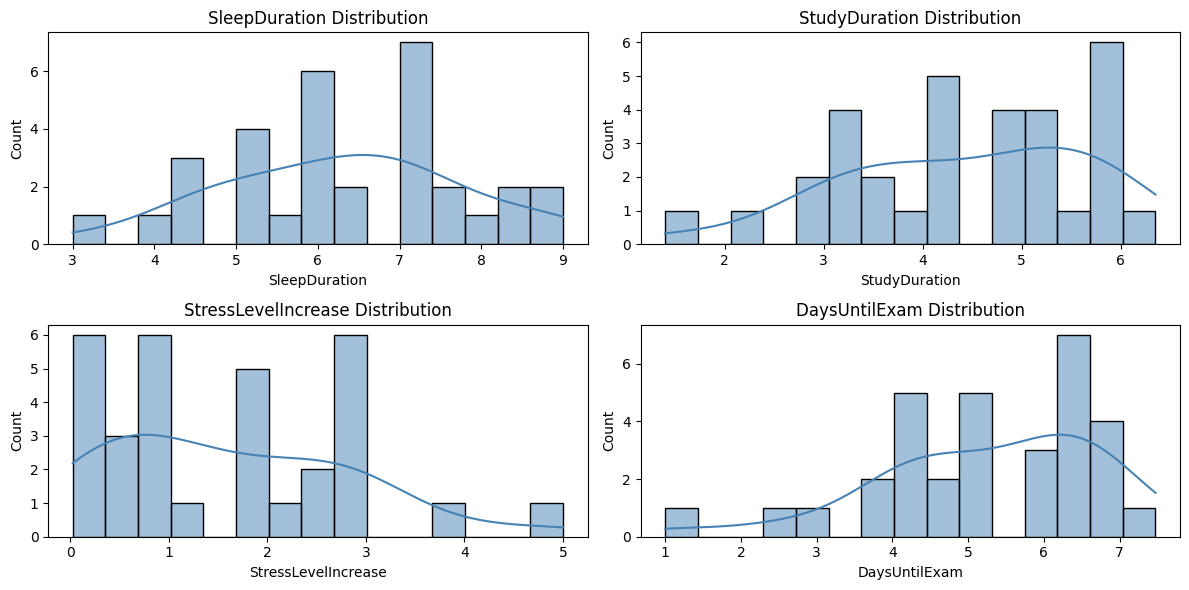

In [61]:

plt.figure(figsize=(12, 6))
for i, column in enumerate(['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], bins=15, kde=True, color='steelblue')
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()


#Boxplot 

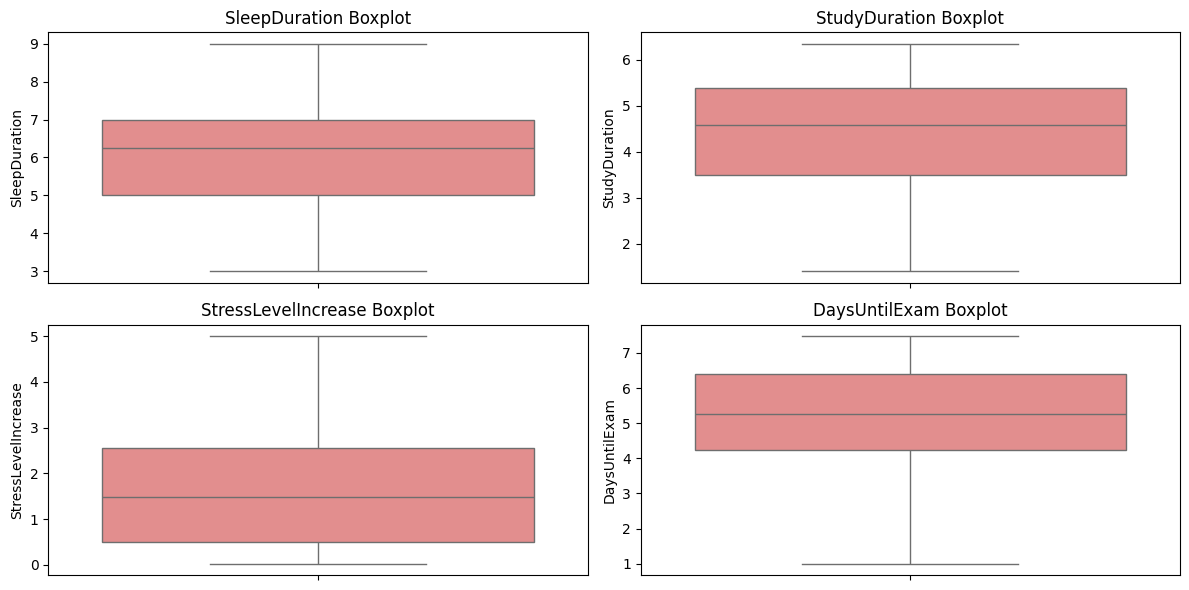

In [62]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[column], color='lightcoral')
    plt.title(f'{column} Boxplot')
plt.tight_layout()
plt.show()

#Scatterplot + Trendline 


<Figure size 1200x600 with 0 Axes>

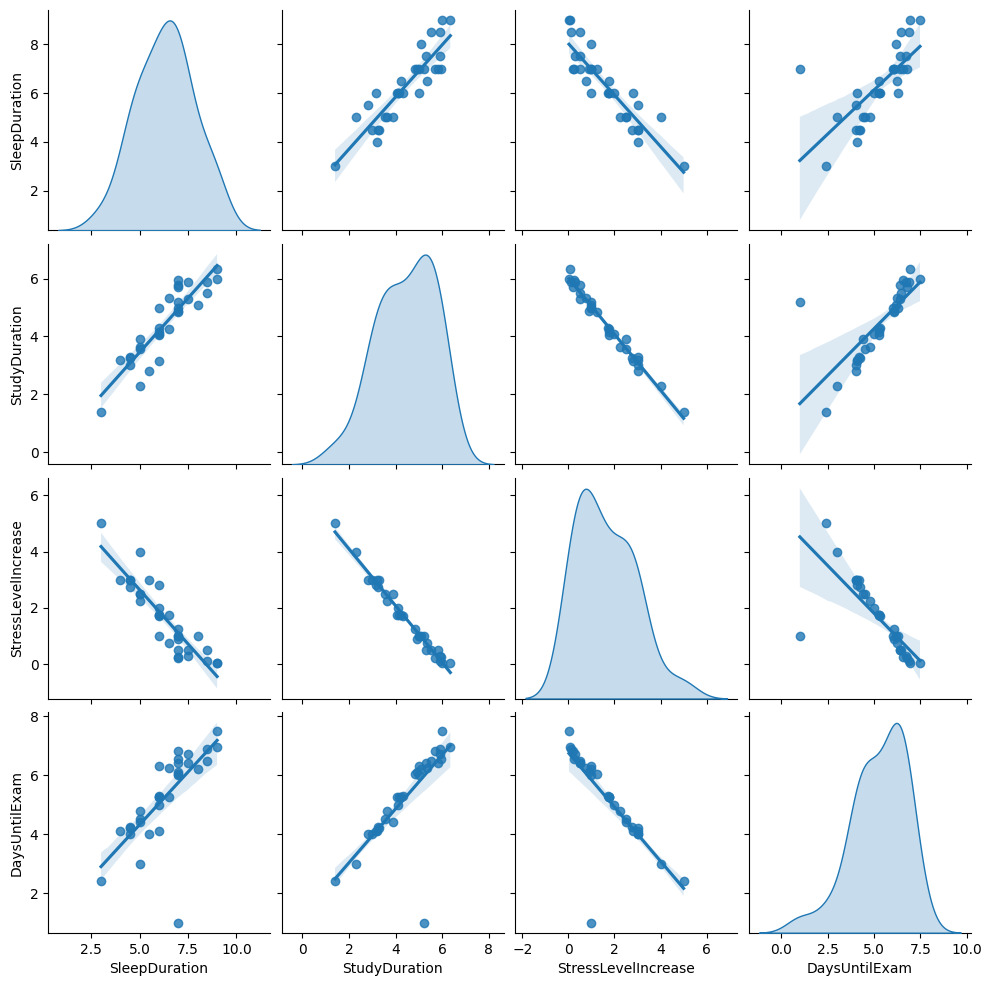

In [63]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']], kind='reg', diag_kind='kde')
plt.show()

#Heatmap

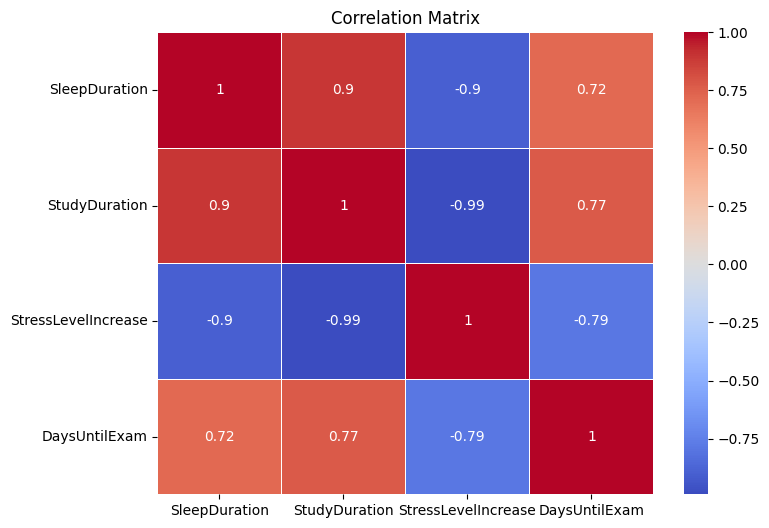

In [64]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['SleepDuration', 'StudyDuration', 'StressLevelIncrease', 'DaysUntilExam']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Regression Analysis


In [65]:
X = df[['SleepDuration', 'StudyDuration', 'DaysUntilExam']]
X = sm.add_constant(X)  # Sabit terimi ekle
y = df['StressLevelIncrease']

model = sm.OLS(y, X).fit()  # Modeli eğit
print(model.summary())  # Regresyon analizini yazdır

                             OLS Regression Results                            
Dep. Variable:     StressLevelIncrease   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     527.5
Date:                 Thu, 03 Apr 2025   Prob (F-statistic):           9.92e-25
Time:                         22:14:20   Log-Likelihood:                 12.547
No. Observations:                   32   AIC:                            -17.09
Df Residuals:                       28   BIC:                            -11.23
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.2637      0.143 

#Scatter Plot (Sleep Duration vs. Stress Level Increase)


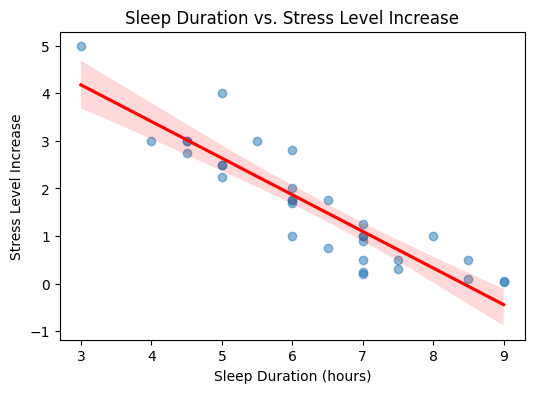

In [66]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df['SleepDuration'], y=df['StressLevelIncrease'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sleep Duration vs. Stress Level Increase')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()

#Scatter Plot (Study Duration vs. Stress Level Increase)

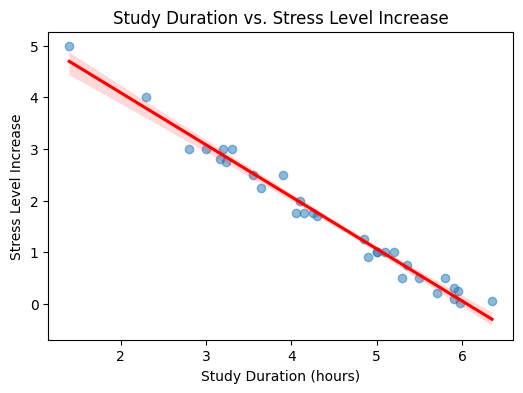

In [67]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df['StudyDuration'], y=df['StressLevelIncrease'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Study Duration vs. Stress Level Increase')
plt.xlabel('Study Duration (hours)')
plt.ylabel('Stress Level Increase')
plt.show()